In [1]:
import pandas as pd
import os
import time
from body_measurement import BodyMeasurement
import json

In [ ]:
def create_measurements_df(image_folder_path, metadata_folder_path):
    all_measurements = []
    try:
        txt_files = [f for f in os.listdir(metadata_folder_path) if f.endswith('.txt')]
    except Exception as e:
        print(f"Error reading directory: {e}")
        return pd.DataFrame()

    for txt_file in txt_files:
        file_path = txt_file
        object_name = os.path.splitext(txt_file)[0]
        measurements_dict = {"file_name": object_name, "file_path": file_path}
        try:
            with open(os.path.join(metadata_folder_path, txt_file), 'r') as f:
                for line in f:
                    line = line.strip()
                    if not line:
                        continue
                    try:
                        if line.startswith("OPTION"):
                            parts = line.split('=')
                            if len(parts) == 2:
                                measurements_dict["OPTION_UNITS"] = parts[1].strip()
                        elif line.startswith("MEASURE"):
                            parts = line.split('=')
                            if len(parts) == 2:
                                measurement_name = parts[0].replace('MEASURE ', '').strip()
                                measurement_value = parts[1].strip()
                                if "Error" not in measurement_value:
                                    try:
                                        measurements_dict[measurement_name] = float(measurement_value)
                                    except ValueError:
                                        measurements_dict[measurement_name] = None
                                else:
                                    measurements_dict[measurement_name] = None
                    except Exception as e:
                        print(f"Error processing line in file {txt_file}: {line}")
                        continue
            image_exists = any(
                os.path.exists(os.path.join(image_folder_path, f"{object_name}.{ext}"))
                for ext in ['jpg', 'jpeg', 'png', 'bmp']
            )
            if image_exists:
                all_measurements.append(measurements_dict)
        except Exception as e:
            print(f"Error processing file {txt_file}: {e}")
            continue
    if not all_measurements:
        print("No valid measurements found")
        return pd.DataFrame()
    df = pd.DataFrame(all_measurements)
    cols = ['file_name', 'OPTION_UNITS'] + [col for col in df.columns if col not in ['file_name', 'OPTION_UNITS']]
    df = df[cols]
    return df

In [3]:
image_folder = "../segmentation_testing/test1/2d_models_male"
metadata_folder = "../segmentation_testing/test1/TC2_Male_Txt"
output_dir = f"./segmentation_testing/iter_testing/iter_{str(int(time.time()))}/"

In [4]:
df = create_measurements_df(image_folder, metadata_folder)
df = df[["file_name", "file_path", "Shoulder_Width_thruTheBody", "Head_Top_Height"]]
df.columns = ["file_name", "file_path", "shoulder_width", "total_height"]

In [6]:
ans = dict()

for _, row in df.iterrows():
    print(f"{image_folder}/{row['file_name']}")
    measurement = BodyMeasurement(
        image_path=f"{image_folder}/{row['file_name']}.png",
        height=row["total_height"],
        is_silhouette=True,
        generate_visualizations=False,
        generate_measurements=False
    )

    tmp = measurement.execute()
    result = {
            "pixel_measurements": tmp["pixel_measurements"],
            "real_measurements": tmp["real_measurements"],
            "original_measurements": {
                "shoulder_width": row["shoulder_width"],
                "total_height": row["total_height"]
            }
        }
    
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, f"{row['file_name']}.json")
    with open(output_path, 'w') as f:
        json.dump(result, f, indent=4)
    ans[row["file_name"]] = result

/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0179


I0000 00:00:1733615373.400785 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1733615373.633738 7484436 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615373.773687 7484436 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615375.160316 7484436 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


/opt/anaconda3/envs/tshirt-size/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0: 640x640 1 person, 5769.5ms
Speed: 9.5ms preprocess, 5769.5ms inference, 53.3ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0145


I0000 00:00:1733615383.790753 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615384.006018 7484588 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615384.172388 7484588 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7979.2ms
Speed: 13.1ms preprocess, 7979.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0151


I0000 00:00:1733615395.362690 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615395.623312 7484703 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615395.758235 7484706 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8867.8ms
Speed: 10.3ms preprocess, 8867.8ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0019


I0000 00:00:1733615407.854013 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615408.108197 7484882 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615408.274957 7484884 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8672.3ms
Speed: 10.9ms preprocess, 8672.3ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0031


I0000 00:00:1733615420.056904 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615420.281099 7485197 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615420.419794 7485200 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8323.7ms
Speed: 7.1ms preprocess, 8323.7ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0025


I0000 00:00:1733615431.783970 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615432.043471 7485350 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615432.200777 7485350 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8643.0ms
Speed: 13.7ms preprocess, 8643.0ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0024


I0000 00:00:1733615443.747935 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615444.002061 7485497 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615444.227750 7485492 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8474.3ms
Speed: 8.9ms preprocess, 8474.3ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0030


I0000 00:00:1733615455.589180 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615455.813746 7485671 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615456.032055 7485671 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 9630.7ms
Speed: 14.5ms preprocess, 9630.7ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0018


I0000 00:00:1733615469.075604 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615469.309184 7485937 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615469.505790 7485937 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8616.3ms
Speed: 10.0ms preprocess, 8616.3ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0150


I0000 00:00:1733615481.475613 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615481.678056 7486142 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615481.874102 7486142 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8316.9ms
Speed: 19.5ms preprocess, 8316.9ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0144


I0000 00:00:1733615493.112637 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615493.327174 7486244 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615493.492202 7486240 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8783.3ms
Speed: 6.3ms preprocess, 8783.3ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0178


I0000 00:00:1733615506.858216 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615507.094875 7486501 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615507.281939 7486501 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 12510.1ms
Speed: 8.1ms preprocess, 12510.1ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0152


I0000 00:00:1733615522.561145 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615522.783278 7486800 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615522.944092 7486800 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 9187.9ms
Speed: 32.6ms preprocess, 9187.9ms inference, 32.3ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0146


I0000 00:00:1733615540.549754 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615540.856182 7487438 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615541.359887 7487440 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 11411.7ms
Speed: 14.5ms preprocess, 11411.7ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0026


I0000 00:00:1733615556.282175 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615556.643247 7487854 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615556.950545 7487854 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8586.8ms
Speed: 12.9ms preprocess, 8586.8ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0032


I0000 00:00:1733615568.837191 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615569.056278 7487992 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615569.216460 7487994 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 9171.0ms
Speed: 7.9ms preprocess, 9171.0ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0033


I0000 00:00:1733615580.965242 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615581.171303 7488134 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615581.329492 7488133 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8388.8ms
Speed: 20.5ms preprocess, 8388.8ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0027


I0000 00:00:1733615592.834522 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615593.075856 7488233 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615593.306576 7488239 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8425.0ms
Speed: 8.8ms preprocess, 8425.0ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0147


I0000 00:00:1733615604.904934 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615605.141472 7488302 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615605.373871 7488308 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7810.4ms
Speed: 21.9ms preprocess, 7810.4ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0153


I0000 00:00:1733615615.753429 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615615.977181 7488406 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615616.117770 7488412 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8107.6ms
Speed: 9.9ms preprocess, 8107.6ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0157


I0000 00:00:1733615627.299253 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615627.519357 7488486 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615627.627013 7488491 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8159.8ms
Speed: 6.3ms preprocess, 8159.8ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0143


I0000 00:00:1733615639.750881 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615639.990878 7488544 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615640.194075 7488544 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7861.3ms
Speed: 9.9ms preprocess, 7861.3ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0023


I0000 00:00:1733615650.693752 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615650.918501 7488691 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615651.045648 7488691 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8270.8ms
Speed: 21.7ms preprocess, 8270.8ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0037


I0000 00:00:1733615662.850067 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615663.057910 7488790 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615663.200484 7488793 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7948.2ms
Speed: 14.6ms preprocess, 7948.2ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0036


I0000 00:00:1733615674.152570 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615674.381155 7488908 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615674.521090 7488908 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8399.6ms
Speed: 37.3ms preprocess, 8399.6ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0022


I0000 00:00:1733615686.261469 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615686.478481 7488975 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615686.670259 7488975 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8289.0ms
Speed: 11.2ms preprocess, 8289.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0142


I0000 00:00:1733615698.217595 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615698.431267 7489064 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615698.684099 7489063 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8231.9ms
Speed: 7.6ms preprocess, 8231.9ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0156


I0000 00:00:1733615709.876134 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615710.115652 7489139 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615710.337929 7489140 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8278.8ms
Speed: 11.7ms preprocess, 8278.8ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0140


I0000 00:00:1733615721.601021 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615721.815965 7489240 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615721.919321 7489240 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8454.0ms
Speed: 7.0ms preprocess, 8454.0ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0154


I0000 00:00:1733615733.831079 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615734.157775 7489329 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615734.621058 7489331 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8320.9ms
Speed: 9.9ms preprocess, 8320.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0168


I0000 00:00:1733615747.082921 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615747.306652 7489574 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615747.468064 7489574 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8619.6ms
Speed: 22.3ms preprocess, 8619.6ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0034


I0000 00:00:1733615759.459298 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615759.690872 7489713 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615759.872004 7489713 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8898.2ms
Speed: 20.5ms preprocess, 8898.2ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0020


I0000 00:00:1733615772.097532 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615772.367885 7489840 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615772.559765 7489840 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 9139.7ms
Speed: 14.2ms preprocess, 9139.7ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0008


Context leak detected, msgtracer returned -1
I0000 00:00:1733615784.782014 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615784.978629 7489916 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615785.112034 7489916 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8327.1ms
Speed: 11.8ms preprocess, 8327.1ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0009


I0000 00:00:1733615796.333780 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615796.568880 7490025 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615796.747146 7490030 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7969.5ms
Speed: 4.1ms preprocess, 7969.5ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0021


I0000 00:00:1733615808.000672 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615808.234526 7490162 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615808.413677 7490162 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8500.9ms
Speed: 6.4ms preprocess, 8500.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0035


I0000 00:00:1733615820.221628 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615820.455176 7490269 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615820.578338 7490275 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8320.2ms
Speed: 5.5ms preprocess, 8320.2ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0169


I0000 00:00:1733615832.875390 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615833.145908 7490373 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615833.316684 7490377 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8441.5ms
Speed: 9.8ms preprocess, 8441.5ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0155


I0000 00:00:1733615844.548753 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615844.782524 7490431 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615845.015812 7490433 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8321.2ms
Speed: 10.2ms preprocess, 8321.2ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0141


I0000 00:00:1733615856.139514 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615856.360143 7490511 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615856.519747 7490513 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8331.5ms
Speed: 10.2ms preprocess, 8331.5ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0126


I0000 00:00:1733615867.729540 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615867.961135 7490589 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615868.170834 7490587 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8292.0ms
Speed: 14.4ms preprocess, 8292.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0132


I0000 00:00:1733615879.494695 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615879.743341 7490649 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615880.161145 7490649 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8345.6ms
Speed: 23.7ms preprocess, 8345.6ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0052


I0000 00:00:1733615891.809034 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615892.025627 7490730 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615892.252150 7490736 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7796.6ms
Speed: 10.2ms preprocess, 7796.6ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0046


I0000 00:00:1733615903.184098 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615903.413725 7490853 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615903.545656 7490858 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8414.7ms
Speed: 9.8ms preprocess, 8414.7ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0091


I0000 00:00:1733615915.213757 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615915.427454 7490937 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615915.533554 7490941 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7779.5ms
Speed: 15.0ms preprocess, 7779.5ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0085


I0000 00:00:1733615927.260186 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615927.539761 7491026 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615927.705214 7491027 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8340.9ms
Speed: 21.1ms preprocess, 8340.9ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0084


I0000 00:00:1733615939.432367 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615939.666506 7491091 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615939.852022 7491096 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8368.5ms
Speed: 24.0ms preprocess, 8368.5ms inference, 7.7ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0090


I0000 00:00:1733615951.351491 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615951.587525 7491214 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615951.745957 7491218 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8444.2ms
Speed: 19.4ms preprocess, 8444.2ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0047


I0000 00:00:1733615963.188091 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615963.468672 7491301 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615963.613799 7491298 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8532.2ms
Speed: 10.2ms preprocess, 8532.2ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0053


Context leak detected, msgtracer returned -1
I0000 00:00:1733615975.103227 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615975.345627 7491409 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615975.551991 7491402 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8302.1ms
Speed: 5.2ms preprocess, 8302.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0133


I0000 00:00:1733615987.307716 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615987.539502 7491544 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615987.728964 7491548 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8073.6ms
Speed: 8.5ms preprocess, 8073.6ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0127


I0000 00:00:1733615998.557245 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733615998.805728 7491632 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733615999.035679 7491632 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8358.7ms
Speed: 29.5ms preprocess, 8358.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0119


I0000 00:00:1733616010.554345 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616010.779081 7491743 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616010.893486 7491742 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8439.7ms
Speed: 8.9ms preprocess, 8439.7ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0131


I0000 00:00:1733616024.179419 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616024.462322 7491969 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616024.658289 7491964 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8401.8ms
Speed: 12.4ms preprocess, 8401.8ms inference, 11.5ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0125


I0000 00:00:1733616035.953972 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616036.206250 7492060 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616036.417007 7492061 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8602.0ms
Speed: 10.4ms preprocess, 8602.0ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0079


I0000 00:00:1733616048.200515 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616048.428666 7492287 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616048.595704 7492287 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8317.8ms
Speed: 10.3ms preprocess, 8317.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0045


I0000 00:00:1733616059.859299 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616060.128398 7492355 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616060.329557 7492356 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7877.4ms
Speed: 10.2ms preprocess, 7877.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0051


I0000 00:00:1733616071.126934 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616071.369677 7492446 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616071.549105 7492446 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8332.0ms
Speed: 27.3ms preprocess, 8332.0ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0086


I0000 00:00:1733616083.530187 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616083.759640 7492549 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616083.963859 7492552 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8232.2ms
Speed: 9.2ms preprocess, 8232.2ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0092


I0000 00:00:1733616095.107892 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616095.370687 7492630 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616095.546231 7492631 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8378.2ms
Speed: 13.6ms preprocess, 8378.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0093


I0000 00:00:1733616106.818052 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616107.033405 7492746 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616107.151285 7492748 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8491.0ms
Speed: 22.4ms preprocess, 8491.0ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0087


I0000 00:00:1733616119.277549 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616119.532469 7492904 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616119.720625 7492904 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7972.5ms
Speed: 17.6ms preprocess, 7972.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0050


I0000 00:00:1733616130.319594 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616130.546907 7492983 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616130.714422 7492983 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8479.4ms
Speed: 15.8ms preprocess, 8479.4ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0044


I0000 00:00:1733616142.511362 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616142.753876 7493086 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616142.918311 7493086 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8949.8ms
Speed: 15.7ms preprocess, 8949.8ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0078


I0000 00:00:1733616154.894757 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616155.143956 7493193 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616155.298655 7493198 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8254.3ms
Speed: 10.9ms preprocess, 8254.3ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0124


I0000 00:00:1733616166.790756 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616167.094944 7493358 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616167.273231 7493358 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8356.0ms
Speed: 14.3ms preprocess, 8356.0ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0130


Context leak detected, msgtracer returned -1
I0000 00:00:1733616178.748876 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616178.974902 7493451 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616179.143351 7493454 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8341.2ms
Speed: 12.7ms preprocess, 8341.2ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0118


I0000 00:00:1733616190.477287 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616190.734786 7493514 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616190.904228 7493514 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8221.1ms
Speed: 5.7ms preprocess, 8221.1ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0134


I0000 00:00:1733616201.968875 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616202.179008 7493641 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616202.306456 7493643 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7949.0ms
Speed: 10.7ms preprocess, 7949.0ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0120


I0000 00:00:1733616214.190934 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616214.466901 7493780 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616214.628150 7493780 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8489.2ms
Speed: 8.6ms preprocess, 8489.2ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0108


I0000 00:00:1733616226.412501 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616226.672558 7493928 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616226.817587 7493931 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8548.6ms
Speed: 9.0ms preprocess, 8548.6ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0040


I0000 00:00:1733616238.424909 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616238.647588 7494025 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616238.882642 7494029 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7942.1ms
Speed: 7.0ms preprocess, 7942.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0054


I0000 00:00:1733616249.523468 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616249.764427 7494120 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616249.914343 7494122 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8523.4ms
Speed: 10.9ms preprocess, 8523.4ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0068


I0000 00:00:1733616261.833579 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616262.086780 7494219 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616262.290730 7494219 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 10036.6ms
Speed: 12.7ms preprocess, 10036.6ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0083


I0000 00:00:1733616275.593026 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616275.856930 7494480 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616276.112764 7494484 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 9128.7ms
Speed: 8.7ms preprocess, 9128.7ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0097


I0000 00:00:1733616288.433940 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616288.676092 7494601 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616288.855866 7494601 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8392.0ms
Speed: 17.7ms preprocess, 8392.0ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0096


I0000 00:00:1733616299.887338 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616300.097978 7494698 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616300.218879 7494700 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7802.7ms
Speed: 10.0ms preprocess, 7802.7ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0082


I0000 00:00:1733616311.700373 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616311.941833 7494812 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616312.125980 7494814 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8275.5ms
Speed: 10.8ms preprocess, 8275.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0069


I0000 00:00:1733616323.314136 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616323.554132 7494920 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616323.701880 7494925 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8395.6ms
Speed: 11.7ms preprocess, 8395.6ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0055


I0000 00:00:1733616335.178786 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616335.390609 7495025 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616335.594964 7495022 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8895.5ms
Speed: 7.6ms preprocess, 8895.5ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0041


I0000 00:00:1733616347.370468 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616347.613513 7495133 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616347.815568 7495128 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7812.5ms
Speed: 10.4ms preprocess, 7812.5ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0109


I0000 00:00:1733616358.293005 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616358.507227 7495213 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616358.680870 7495213 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8181.3ms
Speed: 15.5ms preprocess, 8181.3ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0121


I0000 00:00:1733616369.900680 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616370.179667 7495277 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616370.346670 7495277 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8230.3ms
Speed: 10.3ms preprocess, 8230.3ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0135


Context leak detected, msgtracer returned -1
I0000 00:00:1733616381.765260 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616381.991136 7495456 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616382.144342 7495456 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8012.4ms
Speed: 8.9ms preprocess, 8012.4ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0123


I0000 00:00:1733616392.964604 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616393.154770 7495516 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616393.272746 7495521 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8395.7ms
Speed: 17.4ms preprocess, 8395.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0137


I0000 00:00:1733616405.966370 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616406.233994 7495667 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616406.459084 7495667 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7858.4ms
Speed: 15.4ms preprocess, 7858.4ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0057


I0000 00:00:1733616417.046874 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616417.279295 7495751 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616417.440509 7495751 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8049.6ms
Speed: 15.0ms preprocess, 8049.6ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0043


I0000 00:00:1733616428.322001 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616428.548758 7495813 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616428.699025 7495817 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8367.1ms
Speed: 13.0ms preprocess, 8367.1ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0094


I0000 00:00:1733616440.010631 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616440.266098 7495866 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616440.467924 7495869 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8497.0ms
Speed: 6.1ms preprocess, 8497.0ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0080


I0000 00:00:1733616451.557127 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616451.821614 7495965 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616452.033187 7495965 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8362.7ms
Speed: 6.3ms preprocess, 8362.7ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0081


I0000 00:00:1733616463.260976 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616463.499543 7496089 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616463.650375 7496089 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8176.0ms
Speed: 67.1ms preprocess, 8176.0ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0095


I0000 00:00:1733616476.058019 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616476.300652 7496178 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616476.469807 7496178 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8924.2ms
Speed: 11.1ms preprocess, 8924.2ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0042


I0000 00:00:1733616488.408867 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616488.611055 7496289 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616488.716723 7496289 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8241.3ms
Speed: 17.0ms preprocess, 8241.3ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0056


I0000 00:00:1733616500.937750 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616501.188064 7496404 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616501.339892 7496404 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8372.2ms
Speed: 25.5ms preprocess, 8372.2ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0136


I0000 00:00:1733616512.640098 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616512.857469 7496474 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616512.990143 7496481 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8475.8ms
Speed: 5.9ms preprocess, 8475.8ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0122


I0000 00:00:1733616524.236934 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616524.477529 7496592 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616524.660309 7496592 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8497.9ms
Speed: 12.5ms preprocess, 8497.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0107


I0000 00:00:1733616536.069148 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616536.331909 7496685 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616536.504617 7496685 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8542.4ms
Speed: 14.0ms preprocess, 8542.4ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0113


I0000 00:00:1733616548.014125 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616548.251638 7496773 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616548.504906 7496773 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 9941.5ms
Speed: 10.1ms preprocess, 9941.5ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0073


I0000 00:00:1733616561.734698 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616562.086162 7496958 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616562.415389 7496963 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 8199.4ms
Speed: 46.2ms preprocess, 8199.4ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)
/Users/mukesh003/Documents/projects/TShirt Size predictor/5330_Final_codes/segmentation_measurements/segmentation_testing/test1/2d_models_male/male_0067


Context leak detected, msgtracer returned -1
I0000 00:00:1733616575.070628 7483803 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733616575.279101 7497149 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733616575.527279 7497149 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 640x640 1 person, 7560.6ms
Speed: 40.6ms preprocess, 7560.6ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
import os
import json
import numpy as np

data_dir = "./segmentation_testing/iter_testing/iter_1733615332/"
ans = {}

for filename in os.listdir(data_dir):
    if filename.endswith('.json'):
        file_path = os.path.join(data_dir, filename)
        with open(file_path, 'r') as f:
            ans[filename.replace('.json', '')] = json.load(f)

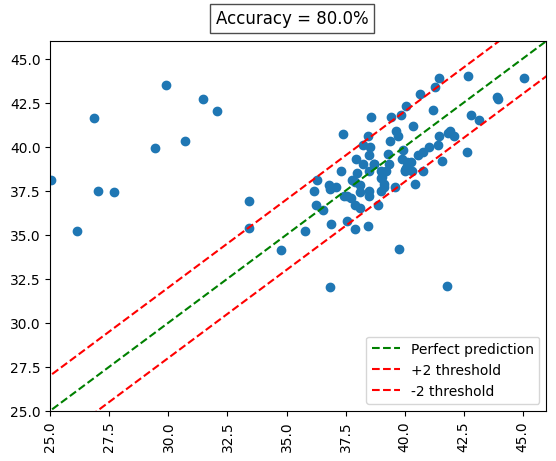

Accuracy = 80.0%


In [6]:
import matplotlib.pyplot as plt

treshold = 2.5

photo_ids = []
for photo_id, val in ans.items():
    if ("shoulder_width" in ans[photo_id]["real_measurements"]):
        photo_ids.append(photo_id)
predict_vals = [ans[photo_id]["real_measurements"]["shoulder_width"] for photo_id in photo_ids]
actual_val = [ans[photo_id]["original_measurements"]["shoulder_width"] for photo_id in photo_ids]

good = 0
for a,b in zip(predict_vals, actual_val):
    c = abs(a - b)
    if (c <= treshold and c >= -treshold):
        good += 1
accuracy = good / len(photo_ids)

plt.scatter(predict_vals, actual_val)
line_range = np.linspace(20, 50, 100)
plt.plot(line_range, line_range, '--', color='green', label='Perfect prediction')
plt.plot(line_range, line_range + 2, '--', color='red', label='+2 threshold')
plt.plot(line_range, line_range - 2, '--', color='red', label='-2 threshold')
plt.xlim(25, 46)
plt.ylim(25, 46)
plt.text(32, 47, f'Accuracy = {accuracy * 100}%', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.xticks(rotation=90)
plt.legend()
plt.show()


print(f"Accuracy = {accuracy * 100}%")

In [7]:
import sys
sys.path.append('..')
from utils import r2_threshold, mae_threshold, rmse_threshold

In [8]:
rmse_threshold(np.array(predict_vals), np.array(actual_val))

(4.036884745348034, 80.0)

In [9]:
mae_threshold(np.array(predict_vals), np.array(actual_val))

(2.432628916041821, 80.0)